In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spoof_data as spoof
import metrics as metric
import kalman_filter as kf

In [2]:
spoofer_ = spoof.SpoofData()

In [3]:
data, noisy_data, timestamps = spoofer_.run1()
filter_ = kf.KalmanFilter(0.0)
filter_.propagate(0)
print(data[0], filter_.new_state_estimate)
filter_.measurementAndUpdate(data[0])


[-0.06  3.    0.  ] [0.0 0.0 0.0]
[[1.0020009999999997 0.0 0.0]
 [0.0 1.0020009999999997 0.0]
 [0.0 0.0 1.0020009999999997]] [[1.0030030009999995 0.0 0.0]
 [0.0 1.0030030009999995 0.0]
 [0.0 0.0 1.0030030009999995]]


TypeError: No loop matching the specified signature and casting was found for ufunc svd_n_s

In [ ]:
data, noisy_data, timestamps = spoofer_.run1()
filter_ = kf.KalmanFilter(0)
estimates = []

for i in range(len(timestamps)):
  estimate = filter_.estimate(timestamps[i],  noisy_data[i])
  estimates.append(estimate)


TypeError: No loop matching the specified signature and casting was found for ufunc inv

In [ ]:
est_accs = []
real_accs = []
for i in range(len(estimates)):
  est_accs.append(estimates[i][0])
  real_accs.append(data[i][0])


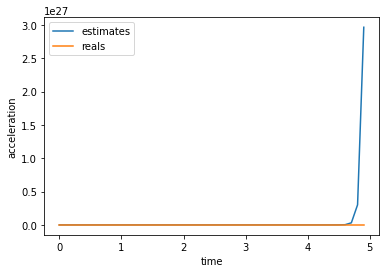

In [ ]:
plt.plot(timestamps[0:50], est_accs[0:50], label="estimates")
plt.plot(timestamps[0:50], real_accs[0:50], label="reals")
plt.xlabel("time")
plt.ylabel("acceleration")
plt.legend()
plt.show()

In [7]:
x = np.array([[1.0020009999999997, 0.0, 0.0],[0.0, 1.0020009999999997, 0.0],[0.0, 0.0, 1.0020009999999997]]) 
y = np.array([[1.0030030009999995, 0.0, 0.0], [0.0, 1.0030030009999995, 0.0], [0.0, 0.0, 1.0030030009999995]])
x@np.linalg.inv(y)

array([[0.999001, 0.      , 0.      ],
       [0.      , 0.999001, 0.      ],
       [0.      , 0.      , 0.999001]])